<a href="https://colab.research.google.com/github/yakshteja2004/codesoft/blob/main/Custom_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries and generate synthetic data

import pandas as pd
import numpy as np

# Seed for reproducibility
np.random.seed(101)

# Generate synthetic sales data for 180 days
data = pd.DataFrame({
    'Date': pd.date_range(start='2024-01-01', periods=180, freq='D'),
    'Store_Location': np.random.choice(['North', 'South', 'East', 'West'], 180),
    'Promotion_Budget': np.random.uniform(50, 400, 180),
    'Customer_Footfall': np.random.randint(100, 1000, 180),
    'Sales': np.random.uniform(100, 800, 180) + np.random.uniform(30, 150, 180) * 0.4
})

print(data.head())

        Date Store_Location  Promotion_Budget  Customer_Footfall       Sales
0 2024-01-01           West         78.036239                851  756.816124
1 2024-01-02           West        262.525695                540  301.208301
2 2024-01-03          South        270.796346                775  376.607727
3 2024-01-04           East        182.279676                243  150.943978
4 2024-01-05           West         54.634354                396  527.857026


In [2]:
#Preprocessing - encode categorical variable and set index

# Encode Store_Location to numeric (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=['Store_Location'], drop_first=True)

# Set Date as index
data_encoded.set_index('Date', inplace=True)

print(data_encoded.head())

            Promotion_Budget  Customer_Footfall       Sales  \
Date                                                          
2024-01-01         78.036239                851  756.816124   
2024-01-02        262.525695                540  301.208301   
2024-01-03        270.796346                775  376.607727   
2024-01-04        182.279676                243  150.943978   
2024-01-05         54.634354                396  527.857026   

            Store_Location_North  Store_Location_South  Store_Location_West  
Date                                                                         
2024-01-01                 False                 False                 True  
2024-01-02                 False                 False                 True  
2024-01-03                 False                  True                False  
2024-01-04                 False                 False                False  
2024-01-05                 False                 False                 True  


In [3]:
#Define features and target

# Features
# Drop 'Sales' and reset the index to remove 'Date' as a column
X = data_encoded.drop('Sales', axis=1).reset_index(drop=True)

# Target
y = data_encoded['Sales'].reset_index(drop=True)

In [4]:
#Split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [5]:
#Train a RandomForestRegressor model and predict

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize model
model = RandomForestRegressor(n_estimators=150, random_state=101)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 57174.01


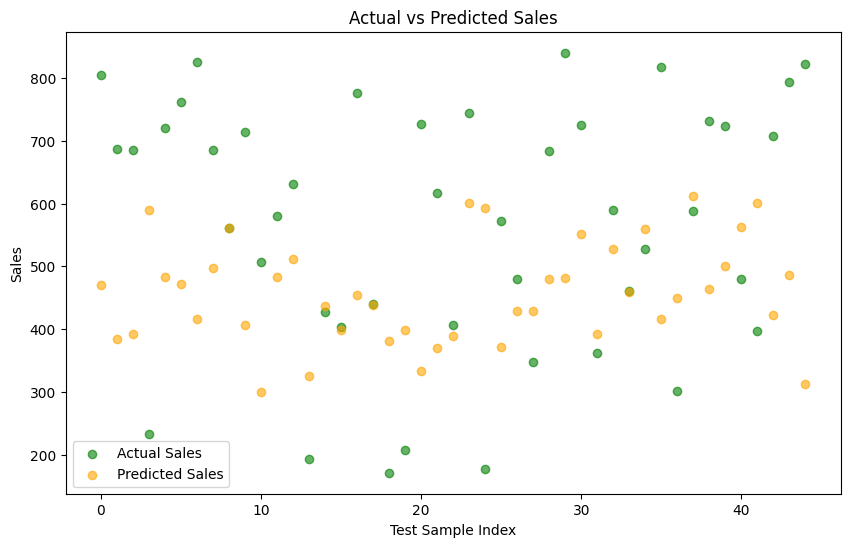

In [6]:
#Visualize actual vs predicted sales

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(range(len(y_test)), y_test, label='Actual Sales', color='green', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, label='Predicted Sales', color='orange', alpha=0.6)
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.xlabel('Test Sample Index')
plt.ylabel('Sales')
plt.show()

In [7]:
#Predict sales on new custom data

# New sample data for prediction
new_data = pd.DataFrame({
    'Promotion_Budget': [120, 350],
    'Customer_Footfall': [450, 700],
    'Store_Location_East': [0, 1],
    'Store_Location_North': [1, 0],
    'Store_Location_South': [0, 0],
    'Store_Location_West': [0, 0]
})

# Ensure new_data columns match the training data columns
# The order of columns matters
# Get the list of columns from the training data (excluding the Date index now)
train_columns = X_train.columns

# Reindex new_data to match the column order and presence of training data
# This handles cases where columns might be missing or in a different order
new_data = new_data.reindex(columns=train_columns, fill_value=0)


future_sales = model.predict(new_data)
print("Predicted Future Sales:", future_sales)

Predicted Future Sales: [549.84587756 387.04044138]
